In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from collections import defaultdict

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', None)

def check_if_rows_match(np_array, target_value): # make sure results are accurate
    for array_index, array in enumerate(np_array):
        sum_value = 0
        for element in array:
            sum_value += element
        if sum_value != target_value:
            print("Target Value Not Met! Sum value is", sum_value, "at array index", array_index)

# Define label types and possible values
label_types = {
    "min_max_label": ["StrongNegative", "PseudoNegative", "PseudoPositive", "StrongPositive"],
    "percentile_label": ["StrongNegative", "PseudoNegative", "PseudoPositive", "StrongPositive"],
    "threshold_label": ["Negative", "Positive"]
}

# Helper function to count label occurrences
def count_labels(df, label_col, possible_values):
    counts = df[label_col].value_counts()
    return [counts.get(label, 0) for label in possible_values]

# Compute mean and std
def compute_stats(counts_dict, label_types):
    results = {}
    for label_type, label_values in label_types.items():
        counts_array = np.array(counts_dict[label_type])  # shape: (5, num_labels)
        mean = np.mean(counts_array, axis=0)
        std = np.std(counts_array, axis=0, ddof=1)  # sample std
        results[label_type] = pd.DataFrame({
            "Label": label_values,
            "Mean": mean,
            "Std": std
        })
    return results

In [2]:
# Initialize containers
cnn3d_positive_counts = defaultdict(list)
gnn_positive_counts = defaultdict(list)
gat_positive_counts = defaultdict(list)
gcn_positive_counts = defaultdict(list)

cnn3d_unlabeled_counts = defaultdict(list)
gnn_unlabeled_counts = defaultdict(list)
gat_unlabeled_counts = defaultdict(list)
gcn_unlabeled_counts = defaultdict(list)

cnn3d_external_counts = defaultdict(list)
gnn_external_counts = defaultdict(list)
gat_external_counts = defaultdict(list)
gcn_external_counts = defaultdict(list)

cnn3d_piezo_counts = defaultdict(list)
gnn_piezo_counts = defaultdict(list)
gat_piezo_counts = defaultdict(list)
gcn_piezo_counts = defaultdict(list)

# Loop over each experiment
for i in range(1, 6):
    # internal positives
    cnn3d_df = pd.read_csv(f"/home/alexhernandez/transmembranebindingAI/Models/Cholesterol/3DCNN/3DCholesterolModels-st_exp{i}/NewResults/TestPositiveCaptureRates_labeled.csv")
    gnn_df = pd.read_csv(f"/home/alexhernandez/transmembranebindingAI/Models/Cholesterol/GNN/GNN-5A_Exp{i}/NewResults/TestPositiveCaptureRates.csv")
    gat_df = pd.read_csv(f"/home/alexhernandez/transmembranebindingAI/Models/Cholesterol/GAT/GATModels-5A_exp{i}v2/NewResults/TestPositiveCaptureRates.csv")
    gcn_df = pd.read_csv(f"/home/alexhernandez/transmembranebindingAI/Models/Cholesterol/GCN/GCN-5A_Exp{i}/Results/TestPositiveCaptureRates.csv")

    for label_type, label_values in label_types.items():
        cnn3d_positive_counts[label_type].append(count_labels(cnn3d_df, label_type, label_values))
        gnn_positive_counts[label_type].append(count_labels(gnn_df, label_type, label_values))
        gat_positive_counts[label_type].append(count_labels(gat_df, label_type, label_values))
        gcn_positive_counts[label_type].append(count_labels(gcn_df, label_type, label_values))

    # unlabeled
    cnn3d_df = pd.read_csv(f"/home/alexhernandez/transmembranebindingAI/Models/Cholesterol/3DCNN/3DCholesterolModels-st_exp{i}/NewResults/TestUnlabeledCaptureRates_labeled.csv")
    gnn_df = pd.read_csv(f"/home/alexhernandez/transmembranebindingAI/Models/Cholesterol/GNN/GNN-5A_Exp{i}/NewResults/TestUnlabeledCaptureRates.csv")
    gat_df = pd.read_csv(f"/home/alexhernandez/transmembranebindingAI/Models/Cholesterol/GAT/GATModels-5A_exp{i}v2/NewResults/TestUnlabeledCaptureRates.csv")
    gcn_df = pd.read_csv(f"/home/alexhernandez/transmembranebindingAI/Models/Cholesterol/GCN/GCN-5A_Exp{i}/Results/TestUnlabeledCaptureRates.csv")

    for label_type, label_values in label_types.items():
        cnn3d_unlabeled_counts[label_type].append(count_labels(cnn3d_df, label_type, label_values))
        gnn_unlabeled_counts[label_type].append(count_labels(gnn_df, label_type, label_values))
        gat_unlabeled_counts[label_type].append(count_labels(gat_df, label_type, label_values))
        gcn_unlabeled_counts[label_type].append(count_labels(gcn_df, label_type, label_values))

    # external positives
    cnn3d_df = pd.read_csv(f"/home/alexhernandez/transmembranebindingAI/Models/Cholesterol/3DCNN/3DCholesterolModels-st_exp{i}/NewResults/TestIvanCaptureRates_labeled.csv")
    gnn_df = pd.read_csv(f"/home/alexhernandez/transmembranebindingAI/Models/Cholesterol/GNN/GNN-5A_Exp{i}/NewResults/TestIvanCaptureRates.csv")
    gat_df = pd.read_csv(f"/home/alexhernandez/transmembranebindingAI/Models/Cholesterol/GAT/GATModels-5A_exp{i}v2/NewResults/TestIvanCaptureRates.csv")
    gcn_df = pd.read_csv(f"/home/alexhernandez/transmembranebindingAI/Models/Cholesterol/GCN/GCN-5A_Exp{i}/Results/TestIvanCaptureRates.csv")

    for label_type, label_values in label_types.items():
        cnn3d_external_counts[label_type].append(count_labels(cnn3d_df, label_type, label_values))
        gnn_external_counts[label_type].append(count_labels(gnn_df, label_type, label_values))
        gat_external_counts[label_type].append(count_labels(gat_df, label_type, label_values))
        gcn_external_counts[label_type].append(count_labels(gcn_df, label_type, label_values))

    cnn3d_df = pd.read_csv(f"/home/alexhernandez/transmembranebindingAI/Models/Cholesterol/3DCNN/3DCholesterolModels-st_exp{i}/NewResults/TestPiezo1_16CaptureRates_labeled.csv")
    gnn_df = pd.read_csv(f"/home/alexhernandez/transmembranebindingAI/Models/Cholesterol/GNN/GNN-5A_Exp{i}/NewResults/TestPiezo1_16CaptureRates.csv")
    gat_df = pd.read_csv(f"/home/alexhernandez/transmembranebindingAI/Models/Cholesterol/GAT/GATModels-5A_exp{i}v2/NewResults/TestPiezo1_16CaptureRates.csv")
    gcn_df = pd.read_csv(f"/home/alexhernandez/transmembranebindingAI/Models/Cholesterol/GCN/GCN-5A_Exp{i}/Results/TestPiezo1_16CaptureRates.csv")

    for label_type, label_values in label_types.items():
        cnn3d_piezo_counts[label_type].append(count_labels(cnn3d_df, label_type, label_values))
        gnn_piezo_counts[label_type].append(count_labels(gnn_df, label_type, label_values))
        gat_piezo_counts[label_type].append(count_labels(gat_df, label_type, label_values))
        gcn_piezo_counts[label_type].append(count_labels(gcn_df, label_type, label_values))

cnn3d_positive_stats = compute_stats(cnn3d_positive_counts, label_types)
gnn_positive_stats = compute_stats(gnn_positive_counts, label_types)
gat_positive_stats = compute_stats(gat_positive_counts, label_types)
gcn_positive_stats = compute_stats(gcn_positive_counts, label_types)

cnn3d_unlabeled_stats = compute_stats(cnn3d_unlabeled_counts, label_types)
gnn_unlabeled_stats = compute_stats(gnn_unlabeled_counts, label_types)
gat_unlabeled_stats = compute_stats(gat_unlabeled_counts, label_types)
gcn_unlabeled_stats = compute_stats(gcn_unlabeled_counts, label_types)

cnn3d_external_stats = compute_stats(cnn3d_external_counts, label_types)
gnn_external_stats = compute_stats(gnn_external_counts, label_types)
gat_external_stats = compute_stats(gat_external_counts, label_types)
gcn_external_stats = compute_stats(gcn_external_counts, label_types)

cnn3d_piezo_stats = compute_stats(cnn3d_piezo_counts, label_types)
gnn_piezo_stats = compute_stats(gnn_piezo_counts, label_types)
gat_piezo_stats = compute_stats(gat_piezo_counts, label_types)
gcn_piezo_stats = compute_stats(gcn_piezo_counts, label_types)

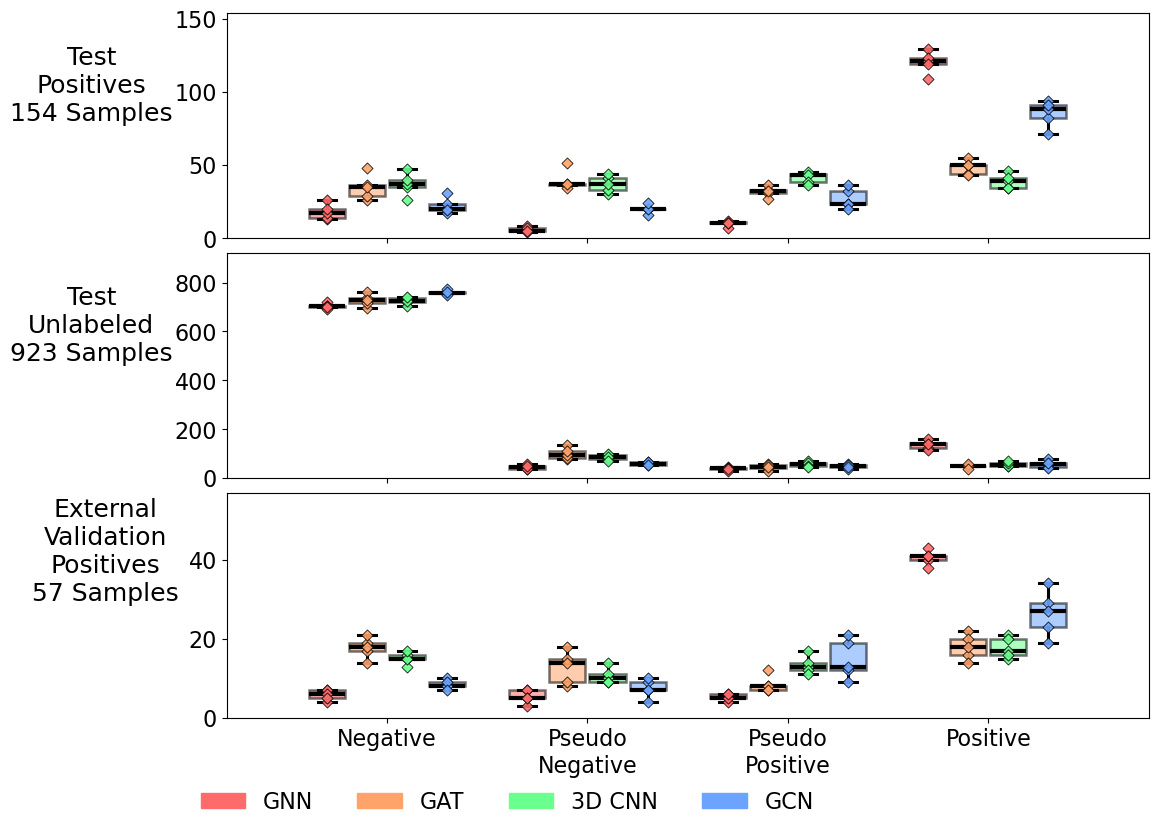

In [12]:
fig, axs = plt.subplots(3, 1, figsize=(8, 15), sharex='col')

xtick_labels_full = ["Negative", "Pseudo\nNegative", "Pseudo\nPositive", "Positive"]
colors = ["#FF6B6B", "#FFA36B", "#6BFF8D", "#6BA3FF"]  # GNN, GAT, 3D CNN, GCN

plt.rcParams.update({
    "axes.labelsize": 18,   # y-axis labels
    "xtick.labelsize": 16,  # x-axis tick labels
    "ytick.labelsize": 16,  # y-axis tick labels
    "axes.titlesize": 20,   # per-panel titles if you add them
    "legend.fontsize": 16,  # legend text
    "figure.titlesize": 22  # suptitle if used
})

def get_counts_matrix(counts_dict, label_type):
    """
    counts_dict[label_type] is a list of length 5 (experiments),
    each element a list of 4 counts [StrongNeg, PseudoNeg, PseudoPos, StrongPos].
    Return array shape: (n_experiments, n_labels).
    """
    return np.array(counts_dict[label_type])


def plot_grouped_boxplots_with_points(ax, model_mats, y_label, ylim=None, show_xticks=False):
    """
    model_mats: list of 4 arrays (one per model),
                each array shape (n_experiments, 4 labels).

    Produces:
      - grouped boxplots with whiskers
      - jittered scatter for individual experiment points
    """
    n_models = len(model_mats)         # 4 models
    n_classes = model_mats[0].shape[1] # 4 label categories

    group_width = 0.8
    box_width   = group_width / n_models

    data = []
    positions = []
    box_colors = []

    # Collect data + positions for boxplot
    for j in range(n_classes):          # label groups
        base = j
        for i in range(n_models):       # models within each group
            vals = model_mats[i][:, j]  # 5 experiments
            data.append(vals)

            pos = base + (i - (n_models - 1) / 2.0) * box_width
            positions.append(pos)
            box_colors.append(colors[i])

    # ----- Boxplot with whiskers -----
    bp = ax.boxplot(
        data,
        positions=positions,
        widths=box_width * 0.9,
        patch_artist=True,
        showfliers=False,   # hide outliers for cleaner look
        whis=1.5            # Tukey whiskers (1.5 * IQR); you can change to [0,100] for min–max
    )

    # Style boxes
    for patch, c in zip(bp['boxes'], box_colors):
        patch.set_facecolor(c)
        patch.set_alpha(0.55)          # semi-transparent so whiskers & points are visible
        patch.set_edgecolor('black')
        patch.set_linewidth(1.8)

    # Style whiskers + caps
    for whisker in bp['whiskers']:
        whisker.set_color('black')
        whisker.set_linewidth(2.2)
        whisker.set_zorder(10)

    for cap in bp['caps']:
        cap.set_color('black')
        cap.set_linewidth(2.2)
        cap.set_zorder(10)

    # Style medians
    for median in bp['medians']:
        median.set_color('black')
        median.set_linewidth(3.0)
        median.set_zorder(11)

    # ----- Overlay individual experiment points (all diamonds, model-colored) -----

    # one color per model (same as box colors), all use diamond marker
    model_marker = 'D'

    k = 0  # index through data/positions
    for j in range(n_classes):              # for each label group
        for i in range(n_models):           # for each model
            vals = data[k]                  # 5 experiment values
            pos  = positions[k]

            # If you want *perfect vertical alignment*, set jitter to 0:
            jitter = 0.0
            # If you still want tiny separation to avoid full overlap, use:
            # jitter = np.random.uniform(-0.01, 0.01, size=len(vals))

            ax.scatter(
                np.full(len(vals), pos) + jitter,
                vals,
                color=colors[i],          # same as box color
                marker=model_marker,      # diamond
                s=32,
                alpha=0.9,
                edgecolor='black',
                linewidth=0.6,
                zorder=15
            )
            k += 1

    # Labels + limits
    ax.set_ylabel(y_label, fontsize=18, rotation=0, labelpad=60)
    if ylim is not None:
        ax.set_ylim(*ylim)

    if show_xticks:
        ax.set_xticks(range(n_classes))
        ax.set_xticklabels(xtick_labels_full, fontsize=16)
    else:
        ax.set_xticks(range(n_classes))
        ax.set_xticklabels([])


# ---------- Row 1: Test Positives (154 samples) ----------
models_pos_mats = [
    get_counts_matrix(gnn_positive_counts, "percentile_label"),
    get_counts_matrix(gat_positive_counts, "percentile_label"),
    get_counts_matrix(cnn3d_positive_counts, "percentile_label"),
    get_counts_matrix(gcn_positive_counts, "percentile_label")
]

plot_grouped_boxplots_with_points(
    axs[0],
    models_pos_mats,
    y_label="Test\nPositives\n154 Samples",
    ylim=(0, 154),
    show_xticks=False
)

# ---------- Row 2: Test Unlabeled (923 samples) ----------
models_unlab_mats = [
    get_counts_matrix(gnn_unlabeled_counts, "percentile_label"),
    get_counts_matrix(gat_unlabeled_counts, "percentile_label"),
    get_counts_matrix(cnn3d_unlabeled_counts, "percentile_label"),
    get_counts_matrix(gcn_unlabeled_counts, "percentile_label")
]

plot_grouped_boxplots_with_points(
    axs[1],
    models_unlab_mats,
    y_label="Test\nUnlabeled\n923 Samples",
    ylim=(0, 923),
    show_xticks=False
)

# ---------- Row 3: External Validation Positives (57 samples) ----------
models_ext_mats = [
    get_counts_matrix(gnn_external_counts, "percentile_label"),
    get_counts_matrix(gat_external_counts, "percentile_label"),
    get_counts_matrix(cnn3d_external_counts, "percentile_label"),
    get_counts_matrix(gcn_external_counts, "percentile_label")
]

plot_grouped_boxplots_with_points(
    axs[2],
    models_ext_mats,
    y_label="External\nValidation\nPositives\n57 Samples",
    ylim=(0, 57),
    show_xticks=True
)

plt.tight_layout()

# Adjust figure size for PowerPoint slide (widescreen 16:9)
fig.set_size_inches(13.33, 7.5)

# Legend (no error bar handle now)
gnn_patch = mpatches.Patch(color='#FF6B6B', label='GNN')
gat_patch = mpatches.Patch(color='#FFA36B', label='GAT')
cnn_patch = mpatches.Patch(color='#6BFF8D', label='3D CNN')
gcn_patch = mpatches.Patch(color='#6BA3FF', label='GCN')

fig.legend(handles=[gnn_patch, gat_patch, cnn_patch, gcn_patch],
           loc='upper center', bbox_to_anchor=(0.5, -0.02),
           ncol=4, fontsize=16, frameon=False)

plt.show()
# fig.savefig("percentile_boxplots_with_points.pdf", bbox_inches="tight")
